In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [2]:
import pandas as pd 
import sqlite3


# read data into DataFrame from db

con = sqlite3.connect("db/olympic_data.db")

sql = f"""
    SELECT * FROM athlete_events
    """

athlete_data = pd.read_sql(sql, con)
athlete_data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",None
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,None
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",None


In [3]:
OlympicGroup = athlete_data.groupby(["Year", "Season", "Sex"])

OlympicAvg = OlympicGroup.mean()
OlympicAvg.head()
# What is the max and min difference in average weight and height?  How much of a change to the SVG file?

ID        Age      Height     Weight
Year Season Sex                                                
1896 Summer M    71099.757895  23.580645  172.739130  71.387755
1900 Summer F    52845.818182  29.791667         NaN        NaN
            M    63869.097740  29.017825  176.637931  74.556962
1904 Summer F    92111.000000  50.230769         NaN        NaN
            M    69986.233463  26.396450  175.788732  72.197279

In [4]:
SexGroup = athlete_data.groupby(["Sex"])

SexAvg = SexGroup.mean()
SexAvg

,ID,Age,Height,Weight,Year
Sex,,,,,
F,69956.722887,23.732881,167.839740,60.021252,1992.445748
M,67601.598304,26.277562,178.858463,75.743677,1973.046064


In [5]:
female_avg_age = float(SexAvg.iloc[0,1])
male_avg_age = float(SexAvg.iloc[1,1])

female_avg_height = float(SexAvg.iloc[0,2])
male_avg_height = float(SexAvg.iloc[1,2])

female_avg_weight = float(SexAvg.iloc[0,3])
male_avg_weight = float(SexAvg.iloc[1,3])

male_avg_weight

75.7436771046865

In [6]:
team_counts = athlete_data["Team"].value_counts()
teams = athlete_data["Team"].nunique() #1184
teams
sports = athlete_data["Sport"].nunique() #66
sports
years = athlete_data["Year"].nunique() #66
years
name = athlete_data["Name"].nunique() #134732
name

134732

In [7]:
# To do:
# Seperate female and male atheletes into different databases.
# Calculate Percent change from average of each year's games for each sex
# Break down by sport as well
# Graph this over time to see if there are interesting trend overall for total or for certain sports
# then determine better way to visualize data

In [8]:
# Original db athlete_data has 271116 rows 
# Remove athletes that have no height or no weight information (NaN); rename as athlete_data_db
# athlete_data_df = athlete_data.dropna(subset=['Height'])
athlete_data_df = athlete_data.dropna(subset=['Weight'])

athlete_data_df # Drops to 210945 w/o NaN in Height; drops to 208241 w/o NaN in Weight; lost 62875 records


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",None
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,None
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",None
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,None
11,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,None


In [9]:
# Use .drop_duplicates to get rid of duplicate names for people competing in multiple events. Consider only columns
# "Games" so that an athelete continues to be represented multiple times if they compete in multiple Olympics
# as their height and weight may change between years of competition. But we don't want them counted multiple
# times within a competition, as that will weight the average.

athlete_data_df2 = athlete_data_df.drop_duplicates(subset= ['ID','Games'])
athlete_data_df2 # 147222 total records now; dropped 61019 records of duplicate events 

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,None
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,None
14,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,None
18,7,John Aalberg,M,31.0,183.0,72.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,None
22,7,John Aalberg,M,33.0,183.0,72.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,None
28,9,Antti Sami Aalto,M,26.0,186.0,96.0,Finland,FIN,2002 Winter,2002,Winter,Salt Lake City,Ice Hockey,Ice Hockey Men's Ice Hockey,None


In [10]:
# This data is no longer good for learning about the events and overall medal for the athletes, 
# since duplicate events have been cut. To avoid confusion, I'm going to cut those columns so no one else uses
# these databases for those analyses. 

athlete_data_df3 = athlete_data_df2.drop('Event', 1)
athlete_data_df3 = athlete_data_df3.drop('Medal', 1)

athlete_data_df3

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing
14,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing
18,7,John Aalberg,M,31.0,183.0,72.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing
22,7,John Aalberg,M,33.0,183.0,72.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing
28,9,Antti Sami Aalto,M,26.0,186.0,96.0,Finland,FIN,2002 Winter,2002,Winter,Salt Lake City,Ice Hockey


In [11]:
# Pulling out all of the data for ALL female athletes (all years, all sports) into one database
female_athlete_df = athlete_data_df3.loc[(athlete_data_df3["Sex"]=="F"), :]
# For some reason, there were still NaN data in here, so I dropped them again:
female_athlete_df = female_athlete_df.dropna(subset=['Height'])
female_athlete_df = female_athlete_df.dropna(subset=['Weight'])

female_athlete_df # Went from 44213 records to 44172 records, so there were still some NaN missed previously?!?

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing
34,14,Pirjo Hannele Aalto (Mattila-),F,32.0,171.0,65.0,Finland,FIN,1994 Winter,1994,Winter,Lillehammer,Biathlon
80,22,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting
87,26,Agnes Erika Aanonsen (-Eyde),F,17.0,169.0,65.0,Norway,NOR,1984 Winter,1984,Winter,Sarajevo,Luge
105,37,Ann Kristin Aarnes,F,23.0,182.0,64.0,Norway,NOR,1996 Summer,1996,Summer,Atlanta,Football
135,49,Moonika Aava,F,24.0,168.0,65.0,Estonia,EST,2004 Summer,2004,Summer,Athina,Athletics


In [12]:
# Checking the .size() parameter below. Seems to be working
# female_athlete_df2= female_athlete_df[female_athlete_df["Year"]==1936]
# female_athlete_df2.sort_values("Sport")


In [13]:
# Pulling out all of the data for ALL male athletes (all years, all sports) into one database
male_athlete_df = athlete_data_df3.loc[(athlete_data_df3["Sex"]=="M"), :]
male_athlete_df = male_athlete_df.dropna(subset=['Height'])
male_athlete_df = male_athlete_df.dropna(subset=['Weight'])
male_athlete_df # From 103009 records to 101746 records, so there were still some NaN records to cut!?!

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing
14,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing
18,7,John Aalberg,M,31.0,183.0,72.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing
22,7,John Aalberg,M,33.0,183.0,72.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing
28,9,Antti Sami Aalto,M,26.0,186.0,96.0,Finland,FIN,2002 Winter,2002,Winter,Salt Lake City,Ice Hockey
30,11,Jorma Ilmari Aalto,M,22.0,182.0,76.5,Finland,FIN,1980 Winter,1980,Winter,Lake Placid,Cross Country Skiing
31,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey


In [14]:
# Make a table of the average height and weight of all female athletes in each sport, by year.
# Total number of athletes represented in each group is also included
female_athlete_sport_year_grp = female_athlete_df.groupby(["Sport","Year"])
female_athlete_mean_df = pd.DataFrame(female_athlete_sport_year_grp["Height", "Weight"].mean())
female_athlete_mean_df["num_of_athletes"] = pd.DataFrame(female_athlete_sport_year_grp["Name"].size())
female_athlete_mean_df = female_athlete_mean_df.rename(columns= {"Height" : "avg_height", "Weight" : "avg_weight"})
female_athlete_mean_df

avg_height  avg_weight  num_of_athletes
Sport         Year                                         
Alpine Skiing 1936  158.500000   51.000000                2
              1948  166.000000   56.333333                6
              1952  170.833333   60.833333                6
              1956  165.444444   58.666667                9
              1960  162.307692   58.615385               13
              1964  163.951220   59.097561               41
              1968  165.886792   59.207547               53
              1972  164.700000   57.660000               50
              1976  166.928571   58.642857               28
              1980  166.187500   58.208333               48
              1984  165.602941   59.441176               68
              1988  165.393939   59.515152               66
              1992  167.421687   62.397590               83
              1994  167.780000   62.980000              100
              1998  168.114583   64.500000               96
              2002  167.440678   64.686441              118
              2006  167.957983   65.000000              119
              2010  168.180451   64.624060              133
              2014  168.803279   64.426230              122
Archery       1972  164.625000   61.000000               16
              1976  166.000000   60.296296               27
              1980  166.689655   61.000000               29
              1984  166.531915   59.744681               47
              1988  165.934426   59.442623               61
              1992  168.113636   60.522727               44
              1996  167.976744   61.837209               43
              2000  167.634921   63.571429               63
              2004  168.250000   62.421875               64
              2008  167.047619   62.301587               63
              2012  166.265625   62.046875               64
...                        ...         ...              ...
Triathlon     2012  167.018519   54.166667               54
              2016  167.690909   54.672727               55
Volleyball    1964  171.014706   64.058824               68
              1968  172.482759   65.908046               87
              1972  173.622222   67.911111               90
              1976  174.750000   66.729167               96
              1980  177.325843   68.741573               89
              1984  178.011236   67.202247               89
              1988  179.010526   68.294737               95
              1992  180.513889   70.486111               72
              1996  181.330189   71.226415              106
              2000  181.731884   71.956522              138
              2004  182.464286   71.721429              140
              2008  183.264286   70.271429              140
              2012  182.349650   69.440559              143
              2016  183.816901   71.091549              142
Water Polo    2000  174.782051   68.641026               78
              2004  174.514851   68.495050              101
              2008  176.077670   71.077670              103
              2012  175.941176   70.568627              102
              2016  176.288462   71.701923              104
Weightlifting 2000  160.717647   66.347059               85
              2004  160.797619   69.476190               84
              2008  160.206897   67.873563               87
              2012  160.059406   66.495050              101
              2016  160.611650   68.631068              103
Wrestling     2004  161.920000   59.240000               50
              2008  163.318182   59.666667               66
              2012  163.640000   60.053333               75
              2016  165.214286   62.000000              112

[471 rows x 3 columns]

In [15]:
# Make a table of the average height and weight of all male athletes in each sport, by year.
# Total number of athletes represented in each group is also included
male_athlete_sport_year_grp = male_athlete_df.groupby(["Sport","Year"])
male_athlete_mean_df = pd.DataFrame(male_athlete_sport_year_grp["Height", "Weight"].mean())
male_athlete_mean_df["num_of_athletes"] = pd.DataFrame(male_athlete_sport_year_grp["Name"].size())
male_athlete_mean_df = male_athlete_mean_df.rename(columns= {"Height" : "avg_height", "Weight" : "avg_weight"})
male_athlete_mean_df2 = male_athlete_mean_df.reset_index(level=['Year'])
male_athlete_mean_df.head()


avg_height  avg_weight  num_of_athletes
Sport         Year                                         
Alpine Skiing 1936  171.500000   71.000000                2
              1948  172.692308   70.000000               13
              1952  174.076923   70.076923               13
              1956  171.315789   69.105263               19
              1960  171.250000   69.285714               28

In [16]:
# Unique years (max of 35) in dataframes is game was offered in each Olympics in dataset:
olympic_years = male_athlete_mean_df2["Year"].unique()
olympic_years.sort()
olympic_years

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016])

In [17]:
# List the sports represented in the database for men
# Didn't work with Sport as the index in the grouped df, so I had to create a new df with a new index (df2)
male_athlete_mean_df3 = male_athlete_mean_df.reset_index(drop=False)
male_athlete_mean_df3.head()
male_athlete_mean_df3["Sport"].unique()
male_athlete_mean_df3.head()
male_athlete_mean_df3["Sport"].value_counts()

# Looking for the games that were offered the most times, as these will be the most likely to show significant trends over time
# Top 11 games:  # of Olympics offered:  index range:
# Athletics                    29 36 : 64
# Swimming                     28 641 : 668
# Gymnastics                   28 357 : 384
# Fencing                      27 277 : 303
# Wrestling                    27 772 : 798
# Cycling                      25 208 : 232
# Boxing                       25 137 : 161
# Weightlifting                25 747 : 771
# Rowing                       25 508 : 532
# Water Polo                   25 722 : 746
# Football                     24 325 : 348
# Ice Hockey                   23 419 : 441
# Sailing                      23 537 : 559
# Ski Jumping                  22 593 : 614
# Cross Country Skiing         22 181 : 202
# Diving                       22 233 : 254
# Equestrianism                22 255 : 276

Athletics                    29
Gymnastics                   28
Swimming                     28
Fencing                      27
Wrestling                    27
Water Polo                   25
Weightlifting                25
Rowing                       25
Cycling                      25
Boxing                       25
Football                     24
Ice Hockey                   23
Sailing                      23
Diving                       22
Equestrianism                22
Cross Country Skiing         22
Ski Jumping                  22
Modern Pentathlon            21
Speed Skating                21
Hockey                       21
Shooting                     21
Figure Skating               21
Bobsleigh                    20
Basketball                   19
Canoeing                     19
Alpine Skiing                19
Nordic Combined              16
Biathlon                     15
Volleyball                   14
Luge                         14
Handball                     13
Judo    

In [18]:
male_athlete_mean_df3.head()
# Make df for each individual men's sport; printing each allows me to get the index # from the male_althete_mean_df3
# the index range is used later to create graphs and look at height or weight over time within each sport
male_athlete_mean_df_athletics = male_athlete_mean_df3[male_athlete_mean_df3['Sport']=='Athletics']
male_athlete_mean_df_rowing = male_athlete_mean_df3[male_athlete_mean_df3['Sport']=='Rowing']
male_athlete_mean_df_gymnast = male_athlete_mean_df3[male_athlete_mean_df3['Sport']=='Gymnastics']
male_athlete_mean_df_swim = male_athlete_mean_df3[male_athlete_mean_df3['Sport']=='Swimming']
male_athlete_mean_df_wrestle = male_athlete_mean_df3[male_athlete_mean_df3['Sport']=='Wrestling']
male_athlete_mean_df_fence = male_athlete_mean_df3[male_athlete_mean_df3['Sport']=='Fencing']
male_athlete_mean_df_cycle = male_athlete_mean_df3[male_athlete_mean_df3['Sport']=='Cycling']
male_athlete_mean_df_box = male_athlete_mean_df3[male_athlete_mean_df3['Sport']=='Boxing']
male_athlete_mean_df_waterpolo = male_athlete_mean_df3[male_athlete_mean_df3['Sport']=='Water Polo']
male_athlete_mean_df_football = male_athlete_mean_df3[male_athlete_mean_df3['Sport']=='Football']
male_athlete_mean_df_weightlift = male_athlete_mean_df3[male_athlete_mean_df3['Sport']=='Weightlifting']
male_athlete_mean_df_hockey = male_athlete_mean_df3[male_athlete_mean_df3['Sport']=='Ice Hockey']
male_athlete_mean_df_sail = male_athlete_mean_df3[male_athlete_mean_df3['Sport']=='Sailing']
male_athlete_mean_df_skijump = male_athlete_mean_df3[male_athlete_mean_df3['Sport']=='Ski Jumping']
male_athlete_mean_df_ccski = male_athlete_mean_df3[male_athlete_mean_df3['Sport']=='Cross Country Skiing']
male_athlete_mean_df_dive = male_athlete_mean_df3[male_athlete_mean_df3['Sport']=='Diving']
male_athlete_mean_df_equestr = male_athlete_mean_df3[male_athlete_mean_df3['Sport']=='Equestrianism']



In [19]:
male_athlete_mean_df_athletics

,Sport,Year,avg_height,avg_weight,num_of_athletes
36,Athletics,1896,175.750000,72.416667,12
37,Athletics,1900,176.520000,73.480000,25
38,Athletics,1904,176.702703,70.756757,37
39,Athletics,1906,177.372549,70.686275,51
40,Athletics,1908,176.927007,70.562044,137
41,Athletics,1912,177.614786,71.344358,257
42,Athletics,1920,177.636872,72.033520,179
43,Athletics,1924,177.355102,71.142857,245
44,Athletics,1928,178.132867,71.909091,286
45,Athletics,1932,178.223810,72.435714,210


In [20]:
# Checking the .iloc statement to make sure it's pulling the data as expected
# male_athlete_mean_df3.iloc[36 : 65, 1] #Year
# male_athlete_mean_df3.iloc[36 : 65, 3] #weight

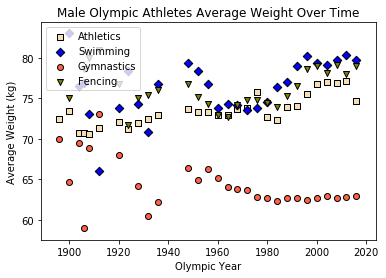

In [21]:
# Make a scatter plot of weight (y) versus year (x) to see which sports saw the most change
# I'm guessing height didn't change as much over 100 years
# Above, I made a new df of each of the most frequently held sports, but I basically used that to find the index range to use here in .iloc
# Athletics                    29 36 : 64
# Swimming                     28 641 : 668
# Gymnastics                   28 357 : 384
# Fencing                      27 277 : 303
x1 = male_athlete_mean_df3.iloc[36 : 65, 1]
y1 = male_athlete_mean_df3.iloc[36 : 65, 3]
x2 = male_athlete_mean_df3.iloc[641 : 669, 1]
y2 = male_athlete_mean_df3.iloc[641 : 669, 3]
x3 = male_athlete_mean_df3.iloc[357 : 385, 1]
y3 = male_athlete_mean_df3.iloc[357 : 385, 3]
x4 = male_athlete_mean_df3.iloc[277 : 304, 1]
y4 = male_athlete_mean_df3.iloc[277 : 304, 3]

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x1, y1, c='wheat', edgecolors = "black", marker="s", label='Athletics')
ax1.scatter(x2,y2, c='blue', edgecolors = "black", marker="D", label='Swimming')
ax1.scatter(x3,y3, c='tomato', edgecolors = "black", marker="o", label='Gymnastics')
ax1.scatter(x4,y4, c='olive', edgecolors = "black", marker="v", label='Fencing')

plt.title("Male Olympic Athletes Average Weight Over Time")
plt.xlabel("Olympic Year")
plt.ylabel("Average Weight (kg)")
plt.legend(loc='upper left')

plt.show()

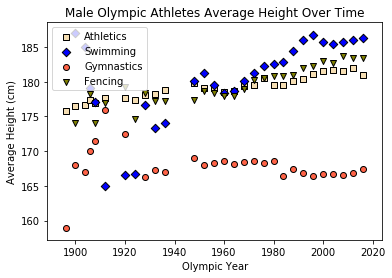

In [22]:
# Same, but for height

# Make a scatter plot of weight (y) versus year (x) to see which sports saw the most change
# I'm guessing height didn't change as much over 100 years
# Above, I made a new df of each of the most frequently held sports, but I basically used that to find the index range to use here in .iloc
# Athletics                    29 36 : 64
# Swimming                     28 641 : 668
# Gymnastics                   28 357 : 384
# Fencing                      27 277 : 303
x1 = male_athlete_mean_df3.iloc[36 : 65, 1]
y1 = male_athlete_mean_df3.iloc[36 : 65, 2]
x2 = male_athlete_mean_df3.iloc[641 : 669, 1]
y2 = male_athlete_mean_df3.iloc[641 : 669, 2]
x3 = male_athlete_mean_df3.iloc[357 : 385, 1]
y3 = male_athlete_mean_df3.iloc[357 : 385, 2]
x4 = male_athlete_mean_df3.iloc[277 : 304, 1]
y4 = male_athlete_mean_df3.iloc[277 : 304, 2]

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x1, y1, c='wheat', edgecolors = "black", marker="s", label='Athletics')
ax1.scatter(x2,y2, c='blue', edgecolors = "black", marker="D", label='Swimming')
ax1.scatter(x3,y3, c='tomato', edgecolors = "black", marker="o", label='Gymnastics')
ax1.scatter(x4,y4, c='olive', edgecolors = "black", marker="v", label='Fencing')

plt.title("Male Olympic Athletes Average Height Over Time")
plt.xlabel("Olympic Year")
plt.ylabel("Average Height (cm)")
plt.legend(loc='upper left')

plt.show()

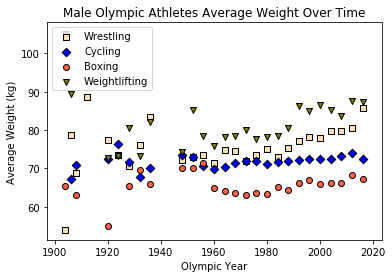

In [23]:
# Wrestling                    27 772 : 798
# Cycling                      25 208 : 232
# Boxing                       25 137 : 161
# Weightlifting                25 747 : 771

x1 = male_athlete_mean_df3.iloc[772 : 799, 1]
y1 = male_athlete_mean_df3.iloc[772 : 799, 3]
x2 = male_athlete_mean_df3.iloc[208 : 233, 1]
y2 = male_athlete_mean_df3.iloc[208 : 233, 3]
x3 = male_athlete_mean_df3.iloc[137 : 162, 1]
y3 = male_athlete_mean_df3.iloc[137 : 162, 3]
x4 = male_athlete_mean_df3.iloc[747 : 772, 1]
y4 = male_athlete_mean_df3.iloc[747 : 772, 3]

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x1, y1, c='wheat', edgecolors = "black", marker="s", label='Wrestling')
ax1.scatter(x2,y2, c='blue', edgecolors = "black", marker="D", label='Cycling')
ax1.scatter(x3,y3, c='tomato', edgecolors = "black", marker="o", label='Boxing')
ax1.scatter(x4,y4, c='olive', edgecolors = "black", marker="v", label='Weightlifting')

plt.title("Male Olympic Athletes Average Weight Over Time")
plt.xlabel("Olympic Year")
plt.ylabel("Average Weight (kg)")
plt.legend(loc='upper left')

plt.show()

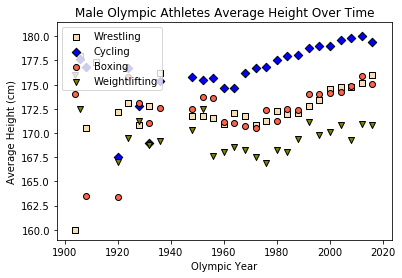

In [24]:
# Same for height

# Wrestling                    27 772 : 798
# Cycling                      25 208 : 232
# Boxing                       25 137 : 161
# Weightlifting                25 747 : 771

x1 = male_athlete_mean_df3.iloc[772 : 799, 1]
y1 = male_athlete_mean_df3.iloc[772 : 799, 2]
x2 = male_athlete_mean_df3.iloc[208 : 233, 1]
y2 = male_athlete_mean_df3.iloc[208 : 233, 2]
x3 = male_athlete_mean_df3.iloc[137 : 162, 1]
y3 = male_athlete_mean_df3.iloc[137 : 162, 2]
x4 = male_athlete_mean_df3.iloc[747 : 772, 1]
y4 = male_athlete_mean_df3.iloc[747 : 772, 2]

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x1, y1, c='wheat', edgecolors = "black", marker="s", label='Wrestling')
ax1.scatter(x2,y2, c='blue', edgecolors = "black", marker="D", label='Cycling')
ax1.scatter(x3,y3, c='tomato', edgecolors = "black", marker="o", label='Boxing')
ax1.scatter(x4,y4, c='olive', edgecolors = "black", marker="v", label='Weightlifting')

plt.title("Male Olympic Athletes Average Height Over Time")
plt.xlabel("Olympic Year")
plt.ylabel("Average Height (cm)")
plt.legend(loc='upper left')

plt.show()

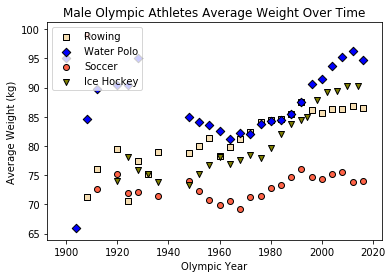

In [25]:
# Rowing                       25 508 : 532
# Water Polo                   25 722 : 746
# Football                     24 325 : 348
# Ice Hockey                   23 419 : 441
x1 = male_athlete_mean_df3.iloc[508 : 533, 1]
y1 = male_athlete_mean_df3.iloc[508 : 533, 3]
x2 = male_athlete_mean_df3.iloc[722 : 747, 1]
y2 = male_athlete_mean_df3.iloc[722 : 747, 3]
x3 = male_athlete_mean_df3.iloc[325 : 349, 1]
y3 = male_athlete_mean_df3.iloc[325 : 349, 3]
x4 = male_athlete_mean_df3.iloc[419 : 442, 1]
y4 = male_athlete_mean_df3.iloc[419 : 442, 3]

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x1, y1, c='wheat', edgecolors = "black", marker="s", label='Rowing')
ax1.scatter(x2,y2, c='blue', edgecolors = "black", marker="D", label='Water Polo')
ax1.scatter(x3,y3, c='tomato', edgecolors = "black", marker="o", label='Soccer')
ax1.scatter(x4,y4, c='olive', edgecolors = "black", marker="v", label='Ice Hockey')

plt.title("Male Olympic Athletes Average Weight Over Time")
plt.xlabel("Olympic Year")
plt.ylabel("Average Weight (kg)")
plt.legend(loc='upper left')

plt.show()

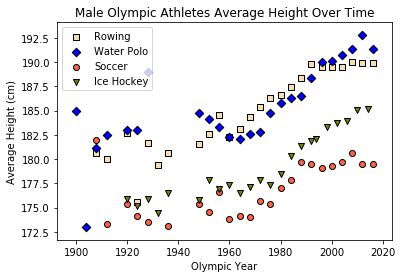

In [26]:
# Same for height

# Rowing                       25 508 : 532
# Water Polo                   25 722 : 746
# Football                     24 325 : 348
# Ice Hockey                   23 419 : 441
x1 = male_athlete_mean_df3.iloc[508 : 533, 1]
y1 = male_athlete_mean_df3.iloc[508 : 533, 2]
x2 = male_athlete_mean_df3.iloc[722 : 747, 1]
y2 = male_athlete_mean_df3.iloc[722 : 747, 2]
x3 = male_athlete_mean_df3.iloc[325 : 349, 1]
y3 = male_athlete_mean_df3.iloc[325 : 349, 2]
x4 = male_athlete_mean_df3.iloc[419 : 442, 1]
y4 = male_athlete_mean_df3.iloc[419 : 442, 2]

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x1, y1, c='wheat', edgecolors = "black", marker="s", label='Rowing')
ax1.scatter(x2,y2, c='blue', edgecolors = "black", marker="D", label='Water Polo')
ax1.scatter(x3,y3, c='tomato', edgecolors = "black", marker="o", label='Soccer')
ax1.scatter(x4,y4, c='olive', edgecolors = "black", marker="v", label='Ice Hockey')

plt.title("Male Olympic Athletes Average Height Over Time")
plt.xlabel("Olympic Year")
plt.ylabel("Average Height (cm)")
plt.legend(loc='upper left')

plt.show()

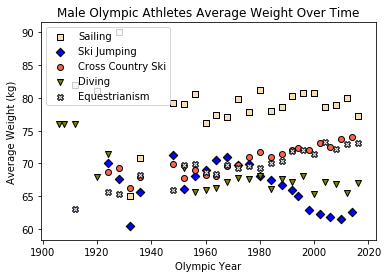

In [27]:
# Sailing                      23 537 : 559
# Ski Jumping                  22 593 : 614
# Cross Country Skiing         22 181 : 202
# Diving                       22 233 : 254
# Equestrianism                22 255 : 276
x1 = male_athlete_mean_df3.iloc[537 : 560, 1]
y1 = male_athlete_mean_df3.iloc[537 : 560, 3]
x2 = male_athlete_mean_df3.iloc[593 : 615, 1]
y2 = male_athlete_mean_df3.iloc[593 : 615, 3]
x3 = male_athlete_mean_df3.iloc[181 : 203, 1]
y3 = male_athlete_mean_df3.iloc[181 : 203, 3]
x4 = male_athlete_mean_df3.iloc[233 : 255, 1]
y4 = male_athlete_mean_df3.iloc[233 : 255, 3]
x5 = male_athlete_mean_df3.iloc[255 : 277, 1]
y5 = male_athlete_mean_df3.iloc[255 : 277, 3]

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x1, y1, c='wheat', edgecolors = "black", marker="s", label='Sailing')
ax1.scatter(x2,y2, c='blue', edgecolors = "black", marker="D", label='Ski Jumping')
ax1.scatter(x3,y3, c='tomato', edgecolors = "black", marker="o", label='Cross Country Ski')
ax1.scatter(x4,y4, c='olive', edgecolors = "black", marker="v", label='Diving')
ax1.scatter(x5,y5, c='lavender', edgecolors = "black", marker="X", label='Equestrianism')


plt.title("Male Olympic Athletes Average Weight Over Time")
plt.xlabel("Olympic Year")
plt.ylabel("Average Weight (kg)")
plt.legend(loc='upper left')

plt.show()

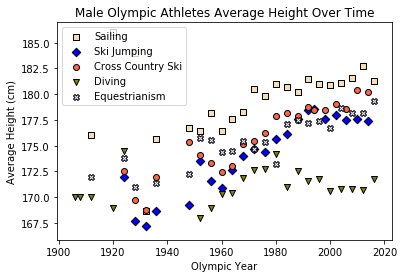

In [28]:
# same for height

# Sailing                      23 537 : 559
# Ski Jumping                  22 593 : 614
# Cross Country Skiing         22 181 : 202
# Diving                       22 233 : 254
# Equestrianism                22 255 : 276
x1 = male_athlete_mean_df3.iloc[537 : 560, 1]
y1 = male_athlete_mean_df3.iloc[537 : 560, 2]
x2 = male_athlete_mean_df3.iloc[593 : 615, 1]
y2 = male_athlete_mean_df3.iloc[593 : 615, 2]
x3 = male_athlete_mean_df3.iloc[181 : 203, 1]
y3 = male_athlete_mean_df3.iloc[181 : 203, 2]
x4 = male_athlete_mean_df3.iloc[233 : 255, 1]
y4 = male_athlete_mean_df3.iloc[233 : 255, 2]
x5 = male_athlete_mean_df3.iloc[255 : 277, 1]
y5 = male_athlete_mean_df3.iloc[255 : 277, 2]

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x1, y1, c='wheat', edgecolors = "black", marker="s", label='Sailing')
ax1.scatter(x2,y2, c='blue', edgecolors = "black", marker="D", label='Ski Jumping')
ax1.scatter(x3,y3, c='tomato', edgecolors = "black", marker="o", label='Cross Country Ski')
ax1.scatter(x4,y4, c='olive', edgecolors = "black", marker="v", label='Diving')
ax1.scatter(x5,y5, c='lavender', edgecolors = "black", marker="X", label='Equestrianism')


plt.title("Male Olympic Athletes Average Height Over Time")
plt.xlabel("Olympic Year")
plt.ylabel("Average Height (cm)")
plt.legend(loc='upper left')

plt.show()

In [29]:
# Continue with builing graphs for female games
# Dropping remaining records with NaN
female_athlete_df = female_athlete_df.dropna(subset=['Height'])
female_athlete_df = female_athlete_df.dropna(subset=['Weight'])
female_athlete_df.head() # From 44172 records to 44172 records, so there were no NaN records left to cut (unlike the men's dataset)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing


In [30]:
# Make a table of the average height and weight of all female athletes in each sport, by year.
# Total number of athletes represented in each group is also included
female_athlete_sport_year_grp = female_athlete_df.groupby(["Sport","Year"])
female_athlete_mean_df = pd.DataFrame(female_athlete_sport_year_grp["Height", "Weight"].mean())
female_athlete_mean_df["num_of_athletes"] = pd.DataFrame(female_athlete_sport_year_grp["Name"].size())
female_athlete_mean_df = female_athlete_mean_df.rename(columns= {"Height" : "avg_height", "Weight" : "avg_weight"})
female_athlete_mean_df2 = female_athlete_mean_df.reset_index(level=['Year'])
female_athlete_mean_df.head()


avg_height  avg_weight  num_of_athletes
Sport         Year                                         
Alpine Skiing 1936  158.500000   51.000000                2
              1948  166.000000   56.333333                6
              1952  170.833333   60.833333                6
              1956  165.444444   58.666667                9
              1960  162.307692   58.615385               13

In [31]:
# List the sports represented in the database for men
# Didn't work with Sport as the index in the grouped df, so I had to create a new df with a new index (df2)
female_athlete_mean_df3 = female_athlete_mean_df.reset_index(drop=False)
female_athlete_mean_df3.head()
female_athlete_mean_df3["Sport"].unique()
female_athlete_mean_df3.head()
female_athlete_mean_df3["Sport"].value_counts()

# Top 11 most commonly offered games:    index:
# Figure Skating               23  192 : 214
# Swimming                     21  382 : 402
# Athletics                    21  31 : 51
# Gymnastics                   19  229: 247
# Alpine Skiing                19  0 : 18
# Fencing                      19  173 : 191
# Diving                       19  138 : 156
# Canoeing                     18  89 : 106
# Cross Country Skiing         17  107 : 123
# Equestrianism                16  157 : 172
# Speed Skating                15  367 : 381

Figure Skating               23
Swimming                     21
Athletics                    21
Gymnastics                   19
Fencing                      19
Alpine Skiing                19
Diving                       19
Canoeing                     18
Cross Country Skiing         17
Equestrianism                16
Speed Skating                15
Volleyball                   14
Luge                         14
Shooting                     13
Sailing                      12
Archery                      12
Basketball                   11
Handball                     11
Rowing                       11
Hockey                       10
Cycling                       9
Synchronized Swimming         9
Rhythmic Gymnastics           9
Tennis                        8
Table Tennis                  8
Biathlon                      7
Short Track Speed Skating     7
Freestyle Skiing              7
Badminton                     7
Judo                          7
Football                      6
Beach Vo

In [68]:
# Make df for each individual women's sport to get the index range
# female_athlete_mean_df_figskate = female_athlete_mean_df3[female_athlete_mean_df3['Sport']=='Figure Skating']
# female_athlete_mean_df_swim = female_athlete_mean_df3[female_athlete_mean_df3['Sport']=='Swimming']
# female_athlete_mean_df_athletics = female_athlete_mean_df3[female_athlete_mean_df3['Sport']=='Athletics']
female_athlete_mean_df_gymnast = female_athlete_mean_df3[female_athlete_mean_df3['Sport']=='Gymnastics']
# female_athlete_mean_df_alpineski = female_athlete_mean_df3[female_athlete_mean_df3['Sport']=='Alpine Skiing']
# female_athlete_mean_df_fence = female_athlete_mean_df3[female_athlete_mean_df3['Sport']=='Fencing']
# female_athlete_mean_df_dive = female_athlete_mean_df3[female_athlete_mean_df3['Sport']=='Diving']
# female_athlete_mean_df_canoe = female_athlete_mean_df3[female_athlete_mean_df3['Sport']=='Canoeing']
# female_athlete_mean_df_ccski = female_athlete_mean_df3[female_athlete_mean_df3['Sport']=='Cross Country Skiing']
# female_athlete_mean_df_equestr = female_athlete_mean_df3[female_athlete_mean_df3['Sport']=='Equestrianism']
# female_athlete_mean_df_speedskate = female_athlete_mean_df3[female_athlete_mean_df3['Sport']=='Speed Skating']
#female_athlete_mean_df_speedskate
female_athlete_mean_df_gymnast.head()


,Sport,Year,avg_height,avg_weight,num_of_athletes
229,Gymnastics,1936,157.000000,52.857143,7
230,Gymnastics,1948,160.000000,57.000000,1
231,Gymnastics,1952,160.148148,54.759259,27
232,Gymnastics,1956,159.588235,54.794118,34
233,Gymnastics,1960,159.350427,53.790598,117


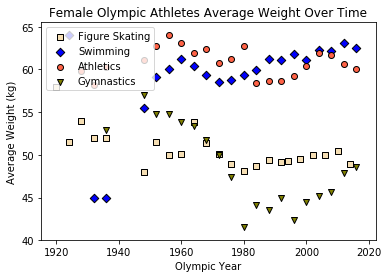

In [33]:
# Make a scatter plot of weight (y) versus year (x) to see which sports saw the most change
# I'm guessing height didn't change as much over 100 years
# Top 11 most commonly offered games:    index:
    # Figure Skating               23  192 : 214
    # Swimming                     21  382 : 402
    # Athletics                    21  31 : 51
    # Gymnastics                   19  229: 247

x1 = female_athlete_mean_df3.iloc[192 : 215, 1]
y1 = female_athlete_mean_df3.iloc[192 : 215, 3]
x2 = female_athlete_mean_df3.iloc[382 : 403, 1]
y2 = female_athlete_mean_df3.iloc[382 : 403, 3]
x3 = female_athlete_mean_df3.iloc[31 : 52, 1]
y3 = female_athlete_mean_df3.iloc[31 : 52, 3]
x4 = female_athlete_mean_df3.iloc[229 : 248, 1]
y4 = female_athlete_mean_df3.iloc[229 : 248, 3]

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x1, y1, c='wheat', edgecolors = "black", marker="s", label='Figure Skating')
ax1.scatter(x2,y2, c='blue', edgecolors = "black", marker="D", label='Swimming')
ax1.scatter(x3,y3, c='tomato', edgecolors = "black", marker="o", label='Athletics')
ax1.scatter(x4,y4, c='olive', edgecolors = "black", marker="v", label='Gymnastics')

plt.title("Female Olympic Athletes Average Weight Over Time")
plt.xlabel("Olympic Year")
plt.ylabel("Average Weight (kg)")
plt.legend(loc='upper left')

plt.show()

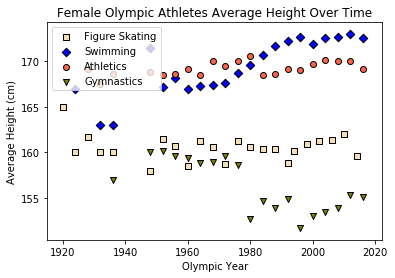

In [34]:
# same for height

# Make a scatter plot of weight (y) versus year (x) to see which sports saw the most change
# I'm guessing height didn't change as much over 100 years
# Top 11 most commonly offered games:    index:
    # Figure Skating               23  192 : 214
    # Swimming                     21  382 : 402
    # Athletics                    21  31 : 51
    # Gymnastics                   19  229: 247

x1 = female_athlete_mean_df3.iloc[192 : 215, 1]
y1 = female_athlete_mean_df3.iloc[192 : 215, 2]
x2 = female_athlete_mean_df3.iloc[382 : 403, 1]
y2 = female_athlete_mean_df3.iloc[382 : 403, 2]
x3 = female_athlete_mean_df3.iloc[31 : 52, 1]
y3 = female_athlete_mean_df3.iloc[31 : 52, 2]
x4 = female_athlete_mean_df3.iloc[229 : 248, 1]
y4 = female_athlete_mean_df3.iloc[229 : 248, 2]

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x1, y1, c='wheat', edgecolors = "black", marker="s", label='Figure Skating')
ax1.scatter(x2,y2, c='blue', edgecolors = "black", marker="D", label='Swimming')
ax1.scatter(x3,y3, c='tomato', edgecolors = "black", marker="o", label='Athletics')
ax1.scatter(x4,y4, c='olive', edgecolors = "black", marker="v", label='Gymnastics')

plt.title("Female Olympic Athletes Average Height Over Time")
plt.xlabel("Olympic Year")
plt.ylabel("Average Height (cm)")
plt.legend(loc='upper left')

plt.show()

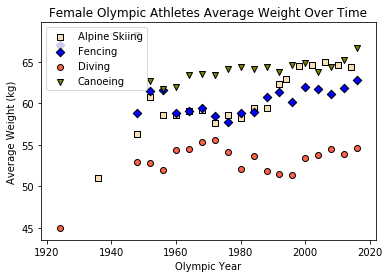

In [35]:
# Make a scatter plot of weight (y) versus year (x) to see which sports saw the most change
# I'm guessing height didn't change as much over 100 years
# Top 11 most commonly offered games:    index:
    # Alpine Skiing                19  0 : 18
    # Fencing                      19  173 : 191
    # Diving                       19  138 : 156
    # Canoeing                     18  89 : 106

x1 = female_athlete_mean_df3.iloc[0 : 19, 1]
y1 = female_athlete_mean_df3.iloc[0 : 19, 3]
x2 = female_athlete_mean_df3.iloc[173 : 192, 1]
y2 = female_athlete_mean_df3.iloc[173 : 192, 3]
x3 = female_athlete_mean_df3.iloc[138 : 157, 1]
y3 = female_athlete_mean_df3.iloc[138 : 157, 3]
x4 = female_athlete_mean_df3.iloc[89 : 107, 1]
y4 = female_athlete_mean_df3.iloc[89 : 107, 3]

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x1, y1, c='wheat', edgecolors = "black", marker="s", label='Alpine Skiing')
ax1.scatter(x2,y2, c='blue', edgecolors = "black", marker="D", label='Fencing')
ax1.scatter(x3,y3, c='tomato', edgecolors = "black", marker="o", label='Diving')
ax1.scatter(x4,y4, c='olive', edgecolors = "black", marker="v", label='Canoeing')

plt.title("Female Olympic Athletes Average Weight Over Time")
plt.xlabel("Olympic Year")
plt.ylabel("Average Weight (kg)")
plt.legend(loc='upper left')

plt.show()

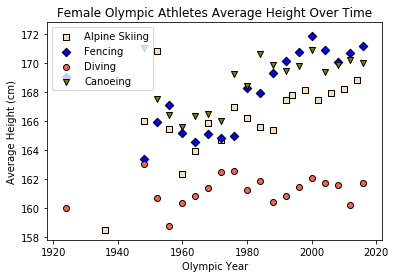

In [36]:
# Same for height

# Make a scatter plot of weight (y) versus year (x) to see which sports saw the most change
# I'm guessing height didn't change as much over 100 years
# Top 11 most commonly offered games:    index:
    # Alpine Skiing                19  0 : 18
    # Fencing                      19  173 : 191
    # Diving                       19  138 : 156
    # Canoeing                     18  89 : 106

x1 = female_athlete_mean_df3.iloc[0 : 19, 1]
y1 = female_athlete_mean_df3.iloc[0 : 19, 2]
x2 = female_athlete_mean_df3.iloc[173 : 192, 1]
y2 = female_athlete_mean_df3.iloc[173 : 192, 2]
x3 = female_athlete_mean_df3.iloc[138 : 157, 1]
y3 = female_athlete_mean_df3.iloc[138 : 157, 2]
x4 = female_athlete_mean_df3.iloc[89 : 107, 1]
y4 = female_athlete_mean_df3.iloc[89 : 107, 2]

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x1, y1, c='wheat', edgecolors = "black", marker="s", label='Alpine Skiing')
ax1.scatter(x2,y2, c='blue', edgecolors = "black", marker="D", label='Fencing')
ax1.scatter(x3,y3, c='tomato', edgecolors = "black", marker="o", label='Diving')
ax1.scatter(x4,y4, c='olive', edgecolors = "black", marker="v", label='Canoeing')

plt.title("Female Olympic Athletes Average Height Over Time")
plt.xlabel("Olympic Year")
plt.ylabel("Average Height (cm)")
plt.legend(loc='upper left')

plt.show()

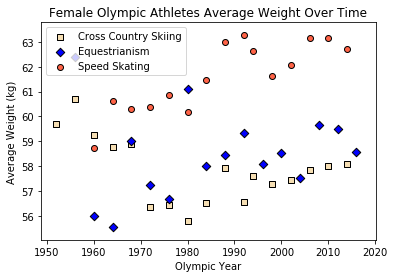

In [37]:
# Make a scatter plot of weight (y) versus year (x) to see which sports saw the most change
# I'm guessing height didn't change as much over 100 years
# Top 11 most commonly offered games:    index:
    # Cross Country Skiing         17  107 : 123
    # Equestrianism                16  157 : 172
    # Speed Skating                15  367 : 381
x1 = female_athlete_mean_df3.iloc[107 : 124, 1]
y1 = female_athlete_mean_df3.iloc[107 : 124, 3]
x2 = female_athlete_mean_df3.iloc[157 : 173, 1]
y2 = female_athlete_mean_df3.iloc[157 : 173, 3]
x3 = female_athlete_mean_df3.iloc[367 : 382, 1]
y3 = female_athlete_mean_df3.iloc[367 : 382, 3]


fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x1, y1, c='wheat', edgecolors = "black", marker="s", label='Cross Country Skiing')
ax1.scatter(x2,y2, c='blue', edgecolors = "black", marker="D", label='Equestrianism')
ax1.scatter(x3,y3, c='tomato', edgecolors = "black", marker="o", label='Speed Skating')

plt.title("Female Olympic Athletes Average Weight Over Time")
plt.xlabel("Olympic Year")
plt.ylabel("Average Weight (kg)")
plt.legend(loc='upper left')

plt.show()

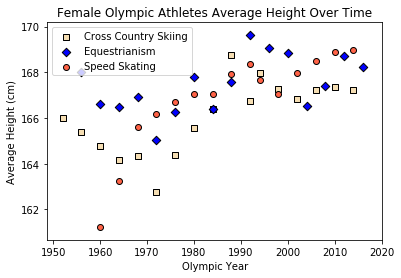

In [38]:
# same for Height

# Make a scatter plot of weight (y) versus year (x) to see which sports saw the most change
# I'm guessing height didn't change as much over 100 years
# Top 11 most commonly offered games:    index:
    # Cross Country Skiing         17  107 : 123
    # Equestrianism                16  157 : 172
    # Speed Skating                15  367 : 381
x1 = female_athlete_mean_df3.iloc[107 : 124, 1]
y1 = female_athlete_mean_df3.iloc[107 : 124, 2]
x2 = female_athlete_mean_df3.iloc[157 : 173, 1]
y2 = female_athlete_mean_df3.iloc[157 : 173, 2]
x3 = female_athlete_mean_df3.iloc[367 : 382, 1]
y3 = female_athlete_mean_df3.iloc[367 : 382, 2]


fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x1, y1, c='wheat', edgecolors = "black", marker="s", label='Cross Country Skiing')
ax1.scatter(x2,y2, c='blue', edgecolors = "black", marker="D", label='Equestrianism')
ax1.scatter(x3,y3, c='tomato', edgecolors = "black", marker="o", label='Speed Skating')

plt.title("Female Olympic Athletes Average Height Over Time")
plt.xlabel("Olympic Year")
plt.ylabel("Average Height (cm)")
plt.legend(loc='upper left')

plt.show()

In [39]:
male_athlete_mean_df3.head()

,Sport,Year,avg_height,avg_weight,num_of_athletes
0,Alpine Skiing,1936,171.500000,71.000000,2
1,Alpine Skiing,1948,172.692308,70.000000,13
2,Alpine Skiing,1952,174.076923,70.076923,13
3,Alpine Skiing,1956,171.315789,69.105263,19
4,Alpine Skiing,1960,171.250000,69.285714,28


In [40]:
female_athlete_mean_df3.head()

,Sport,Year,avg_height,avg_weight,num_of_athletes
0,Alpine Skiing,1936,158.500000,51.000000,2
1,Alpine Skiing,1948,166.000000,56.333333,6
2,Alpine Skiing,1952,170.833333,60.833333,6
3,Alpine Skiing,1956,165.444444,58.666667,9
4,Alpine Skiing,1960,162.307692,58.615385,13


In [41]:
F_diving_df =female_athlete_mean_df3[female_athlete_mean_df3["Sport"]=="Diving"]
F_diving_df

,Sport,Year,avg_height,avg_weight,num_of_athletes
138,Diving,1924,160.000000,45.000000,1
139,Diving,1948,163.000000,53.000000,3
140,Diving,1952,160.666667,52.833333,6
141,Diving,1956,158.769231,51.923077,13
142,Diving,1960,160.333333,54.375000,24
143,Diving,1964,160.823529,54.470588,34
144,Diving,1968,161.342857,55.371429,35
145,Diving,1972,162.487805,55.634146,41
146,Diving,1976,162.538462,54.153846,39
147,Diving,1980,161.242424,52.090909,33


In [42]:
# combine into one table for males and females
athletic_build_avg = male_athlete_mean_df3.merge(female_athlete_mean_df3, on=["Sport", "Year"],
                             how="outer", suffixes=("_M", "_F"))
athletic_build_avg
# One Diving entry (from 1948) was by itself indexed as 799. Did I lose the rest in the join?  Pull out diving data to check:
# ath_diving_df = athletic_build_avg[athletic_build_avg["Sport"]=="Diving"]
# ath_diving_df #there are diving enteries from index 233-799, sequential by year, expect index 799 with 1948 women's data.

# Sort by sport, then year, to make sure the whole list is sorted correctly.
athlete_build_avg = athletic_build_avg.sort_values(["Sport", "Year"])
# Reset index upon the new sort
athlete_build_avg = athlete_build_avg.reset_index(drop=True)
athlete_build_avg 

#list looks better, check diving data subset again
ath_diving_df2 = athlete_build_avg[athlete_build_avg["Sport"]=="Diving"]
ath_diving_df2.head() #looks good, all data is sequentially indexed

athlete_build_avg


,Sport,Year,avg_height_M,avg_weight_M,num_of_athletes_M,avg_height_F,avg_weight_F,num_of_athletes_F
0,Alpine Skiing,1936,171.500000,71.000000,2.0,158.500000,51.000000,2.0
1,Alpine Skiing,1948,172.692308,70.000000,13.0,166.000000,56.333333,6.0
2,Alpine Skiing,1952,174.076923,70.076923,13.0,170.833333,60.833333,6.0
3,Alpine Skiing,1956,171.315789,69.105263,19.0,165.444444,58.666667,9.0
4,Alpine Skiing,1960,171.250000,69.285714,28.0,162.307692,58.615385,13.0
5,Alpine Skiing,1964,172.686047,71.087209,86.0,163.951220,59.097561,41.0
6,Alpine Skiing,1968,173.904000,71.508000,125.0,165.886792,59.207547,53.0
7,Alpine Skiing,1972,175.179775,70.966292,89.0,164.700000,57.660000,50.0
8,Alpine Skiing,1976,174.610169,71.508475,59.0,166.928571,58.642857,28.0
9,Alpine Skiing,1980,175.590909,73.075758,66.0,166.187500,58.208333,48.0


In [65]:
# working with this data merged in sqlite ended up being a problem as it created NaN entries for one sex if
# it wasn't represented in the games (for example, male wretling is represented from 1904 and women didn't 
# start until 2004)

# Go back to separate tables and double check that there are no NaN data:
# I'm also renaming the seperate (fe)male_athlete_mean_df3 df to athlete_build_avg_F/M so that the name
# of the table matches what I already have in my connectedScatter.js file and app.py
# differentiating between the two tables with _F or _M

athlete_build_avg_M = male_athlete_mean_df3.dropna(subset=['avg_height'])
athlete_build_avg_M = male_athlete_mean_df3.dropna(subset=['avg_height'])
athlete_build_avg_M.head()

athlete_build_avg_F = female_athlete_mean_df3.dropna(subset=['avg_weight'])
athlete_build_avg_F = female_athlete_mean_df3.dropna(subset=['avg_weight'])
athlete_build_avg_F.head()

# There were 799 male records and #471 female records before and after .dropna for height and weight, so no NaN data remained to be cut



,Sport,Year,avg_height,avg_weight,num_of_athletes
0,Alpine Skiing,1936,158.500000,51.000000,2
1,Alpine Skiing,1948,166.000000,56.333333,6
2,Alpine Skiing,1952,170.833333,60.833333,6
3,Alpine Skiing,1956,165.444444,58.666667,9
4,Alpine Skiing,1960,162.307692,58.615385,13


In [66]:
# uploading these tables to sqlite DB:
con = sqlite3.connect("db/olympic_data.db")
athlete_build_avg_F.to_sql("athlete_build_avg_f", con, if_exists="replace", index=False)

con.commit()
con = sqlite3.connect("db/olympic_data.db")
athlete_build_avg_M.to_sql("athlete_build_avg_m", con, if_exists="replace", index=False)

con.commit()

In [46]:
# uploading it to sqlite DB

con = sqlite3.connect("db/olympic_data.db")
athlete_build_avg.to_sql("athlete_build_avg", con, if_exists="replace", index=False)

con.commit()


In [58]:
# I also need a table of the individual athletes height and weight for the scatterplots
# Get data from female_athlete_df and male_athlete_df, clean it and upload to sqlite DB

# Cut columns that aren't needed for this analysis
female_athlete_build_df = female_athlete_df.drop(['Sex', 'Team', 'Games', 'Season', 'City'], 1)
female_athlete_build_df.head()
male_athlete_build_df = male_athlete_df.drop(['Sex', 'Team', 'Games', 'Season', 'City'], 1)
male_athlete_build_df.head()

# Sort each df by Sport, then Year
female_athlete_build_df = female_athlete_build_df.sort_values(["Sport", "Year", "ID"])
female_athlete_build_df.head()

male_athlete_build_df = male_athlete_build_df.sort_values(["Sport", "Year", "ID"])
male_athlete_build_df.head()

# reset index upon the new sort
female_athlete_build_df = female_athlete_build_df.reset_index(drop=True)
female_athlete_build_df.head() 
male_athlete_build_df = male_athlete_build_df.reset_index(drop=True)
male_athlete_build_df.head()




,ID,Name,Age,Height,Weight,NOC,Year,Sport
0,2792,mile Allais,23.0,168.0,68.0,FRA,1936,Alpine Skiing
1,133735,Karol Marian Zajc (-Sayons),22.0,175.0,74.0,POL,1936,Alpine Skiing
2,3022,Pentti Johannes Alonen,22.0,172.0,65.0,FIN,1948,Alpine Skiing
3,12204,"Robert ""Bob"" Blatt, Jr.",26.0,181.0,76.0,USA,1948,Alpine Skiing
4,23517,James Couttet,26.0,168.0,67.0,FRA,1948,Alpine Skiing


In [59]:
# upload to sqlite DB
con = sqlite3.connect("db/olympic_data.db")
female_athlete_build_df.to_sql("female_athlete_build", con, if_exists="replace", index=False)

con.commit()

con = sqlite3.connect("db/olympic_data.db")
male_athlete_build_df.to_sql("male_athlete_build", con, if_exists="replace", index=False)

con.commit()

In [60]:
female_athlete_build_df.head() 

,ID,Name,Age,Height,Weight,NOC,Year,Sport
0,94342,"Hadwig ""Hadi"" Pfeifer (Lantschner-)",29.0,155.0,52.0,GER,1936,Alpine Skiing
1,129343,"Margarethe ""Gretl"" Weikert",21.0,162.0,50.0,AUT,1936,Alpine Skiing
2,23747,"Rebecca Ann Fraser ""Becky"" Cremer",23.0,157.0,49.0,USA,1948,Alpine Skiing
3,36846,Gretchen Claudia Fraser (Kunigk-),28.0,163.0,53.0,USA,1948,Alpine Skiing
4,42455,"Brynhild Grasmoen (-Robinson, -Dedrick)",19.0,175.0,59.0,USA,1948,Alpine Skiing


In [61]:
male_athlete_build_df.head() 

,ID,Name,Age,Height,Weight,NOC,Year,Sport
0,2792,mile Allais,23.0,168.0,68.0,FRA,1936,Alpine Skiing
1,133735,Karol Marian Zajc (-Sayons),22.0,175.0,74.0,POL,1936,Alpine Skiing
2,3022,Pentti Johannes Alonen,22.0,172.0,65.0,FIN,1948,Alpine Skiing
3,12204,"Robert ""Bob"" Blatt, Jr.",26.0,181.0,76.0,USA,1948,Alpine Skiing
4,23517,James Couttet,26.0,168.0,67.0,FRA,1948,Alpine Skiing


In [71]:
# upload small dataset to sqlite DB to play with: male_athlete_mean_df_waterpolo
con = sqlite3.connect("db/olympic_data.db")
male_athlete_mean_df_waterpolo.to_sql("male_athlete_mean_df_waterpolo", con, if_exists="replace", index=False)

con.commit()

In [69]:
female_athlete_mean_df_gymnast.head()

,Sport,Year,avg_height,avg_weight,num_of_athletes
229,Gymnastics,1936,157.000000,52.857143,7
230,Gymnastics,1948,160.000000,57.000000,1
231,Gymnastics,1952,160.148148,54.759259,27
232,Gymnastics,1956,159.588235,54.794118,34
233,Gymnastics,1960,159.350427,53.790598,117


In [70]:
# upload small dataset to sqlite DB to play with: female_athlete_mean_df_gymnast
con = sqlite3.connect("db/olympic_data.db")
female_athlete_mean_df_gymnast.to_sql("female_athlete_mean_df_gymnast", con, if_exists="replace", index=False)

con.commit()